<a href="https://colab.research.google.com/github/alaka2019/Tax-Payer-Political-Party/blob/main/Tax_Payer_Political_Party.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
tax_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv" )
print(tax_data.shape)
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv')
print(test_data.shape)

(803, 11)
(201, 10)


In [ ]:
tax_train=tax_data.drop('Unnamed: 0',axis=1)
tax_train.shape

(803, 10)

In [ ]:
tax_test=test_data.drop('Unnamed: 0',axis=1)
tax_test.shape

(201, 9)

In [ ]:
print(tax_data.head)
print(test_data.head)
tax_features=tax_data.drop('Unnamed: 0',axis=1)

<bound method NDFrame.head of      Unnamed: 0     HHI    HHDL  ...  Filed in 2016  Filed in 2015  PoliticalParty
0            61  183414  -12402  ...              0              1        Democrat
1           501  129786  700251  ...              0              0      Republican
2           658  268343  493411  ...              0              1     Independent
3           703  290506 -433408  ...              0              1      Republican
4           702   90108  907135  ...              1              0        Democrat
..          ...     ...     ...  ...            ...            ...             ...
798         476  153304  971909  ...              0              0        Democrat
799         657  136652 -184616  ...              0              0        Democrat
800         596   51066 -900262  ...              0              0        Democrat
801         561  123721  -51448  ...              1              1      Republican
802         635  189020  839546  ...              0      

In [ ]:
tr=tax_train.drop('PoliticalParty',axis=1)
tax_features=tr.append(tax_test)
tax_features = tax_features.reset_index(drop=True)

print(tax_features.dtypes)
print(tax_features.shape)

HHI              int64
HHDL             int64
Married          int64
CollegGrads      int64
AHHAge           int64
Cars             int64
Filed in 2017    int64
Filed in 2016    int64
Filed in 2015    int64
dtype: object
(1004, 9)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(tax_features) 
tax_features.loc[:,:] = scaled_values

print(tax_features.head(10))

        HHI      HHDL  Married  ...  Filed in 2017  Filed in 2016  Filed in 2015
0  0.611752  0.493889      0.5  ...            0.0            0.0            1.0
1  0.432703  0.850283      1.0  ...            0.0            0.0            0.0
2  0.895307  0.746844      1.0  ...            1.0            0.0            1.0
3  0.969304  0.283347      0.5  ...            1.0            0.0            1.0
4  0.300229  0.953745      0.5  ...            1.0            1.0            0.0
5  0.279549  0.846780      0.5  ...            1.0            0.0            0.0
6  0.480256  0.333850      0.0  ...            0.0            1.0            0.0
7  0.524478  0.263878      0.0  ...            1.0            0.0            1.0
8  0.513313  0.747328      0.5  ...            0.0            1.0            1.0
9  0.389850  0.780226      0.0  ...            0.0            0.0            1.0

[10 rows x 9 columns]


In [ ]:
from sklearn.feature_selection import VarianceThreshold

tax_var = VarianceThreshold()

# Perform variance thresholding
tax_var.fit_transform(tax_features)

# Print the name and variance of each feature
for feature in zip(tax_features.columns, tax_var.variances_):
    print(feature)


('HHI', 0.0826836909431263)
('HHDL', 0.08808077398785347)
('Married', 0.16262539483500266)
('CollegGrads', 0.11377771781400295)
('AHHAge', 0.0814913078876256)
('Cars', 0.11570526658307012)
('Filed in 2017', 0.24993650894430242)
('Filed in 2016', 0.24983234393104867)
('Filed in 2015', 0.24990079522547254)


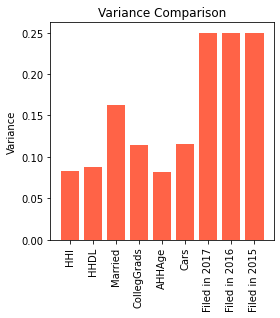

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(4,4))
plt.bar(x=tax_features.columns, height=tax_var.variances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Variance Comparison')

plt.show()

In [ ]:
selector = VarianceThreshold(threshold=0.15)

tax_features_new = selector.fit_transform(tax_features)

print('Number of features before variance thresholding: {}'.format(tax_features.shape[1]))
print('Number of features after variance thresholding: {}'.format(tax_features_new.shape[1]))

Number of features before variance thresholding: 9
Number of features after variance thresholding: 4


In [ ]:
tax_features = ['Married','Filed in 2017','Filed in 2016','Filed in 2015']
tax_labels = ['PoliticalParty']

tax_train_features = tax_train[tax_features]
tax_train_label = tax_train[tax_labels]

tax_test_features = tax_test[tax_features]

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier(max_depth=3)

dt.fit(tax_train_features, tax_train_label)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
target = dt.predict(tax_test_features)

res=pd.DataFrame(target)
res.index=tax_test_features.index
res.columns=["prediction"]

from google.colab import files
res.to_csv('prediction_result.csv')         
files.download('prediction_result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>